# Explore here

In [724]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from sklearn.impute import KNNImputer
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import make_regression
from xgboost import XGBClassifier
from xgboost import plot_importance
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


# Load the dataset
#dataset = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv")
#dataset

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")

# Print the first rows of the dataframe for visualization
df.head()





,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [725]:
df.shape


(41188, 21)

In [726]:
df.head().T


,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [727]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [728]:
# Start Exploratory data analysis (EDA)

# Count the number of unique values in the dataframe
print("Number of unique values:")
df.nunique()
# There are no unique values to remove

Number of unique values:


age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [729]:
# Get the unique values of some columns
print(f"job values: {df['job'].unique()}")
print(f"marital values: {df['marital'].unique()}")
print(f"education values: {df['education'].unique()}")
print(f"default values: {df['default'].unique()}")
print(f"housing values: {df['housing'].unique()}")
print(f"loan values: {df['loan'].unique()}")
print(f"contact values: {df['contact'].unique()}")
print(f"month values: {df['month'].unique()}")
print(f"day_of_week values: {df['day_of_week'].unique()}")
print(f"poutcome values: {df['poutcome'].unique()}")
print(f"nr.employed values: {df['nr.employed'].unique()}")
print(f"y values: {df['y'].unique()}")

job values: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital values: ['married' 'single' 'divorced' 'unknown']
education values: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default values: ['no' 'unknown' 'yes']
housing values: ['no' 'yes' 'unknown']
loan values: ['no' 'yes' 'unknown']
contact values: ['telephone' 'cellular']
month values: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week values: ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome values: ['nonexistent' 'failure' 'success']
nr.employed values: [5191.  5228.1 5195.8 5176.3 5099.1 5076.2 5017.5 5023.5 5008.7 4991.6
 4963.6]
y values: ['no' 'yes']


In [730]:
# Eliminate irrelevant information
df.drop(['month', 'day_of_week','nr.employed'],axis=1, inplace=True)
df.shape

(41188, 18)

In [731]:
# Check if duplicates
print(f"Duplicate values: {df.duplicated().sum():.2f}")

# Eliminate duplicated values:
df = df.drop_duplicates().reset_index(drop = True)
df.shape

Duplicate values: 13.00


(41175, 18)

In [732]:
# Description of the numeric variables
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,41175.0,40.023679,10.420778,17.000,32.000,38.000,47.000,98.000
duration,41175.0,258.319150,259.307587,0.000,102.000,180.000,319.000,4918.000
campaign,41175.0,2.567917,2.770341,1.000,1.000,2.000,3.000,56.000
pdays,41175.0,962.463922,186.939285,0.000,999.000,999.000,999.000,999.000
previous,41175.0,0.173018,0.494970,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41175.0,0.081897,1.570894,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41175.0,93.575710,0.578842,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41175.0,-40.502963,4.627872,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41175.0,3.621263,1.734447,0.634,1.344,4.857,4.961,5.045


In [733]:
# Check the lines with at least one isnull value (%)
df.isnull().sum()
# There are no isnull values in the dataframe 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
y                 0
dtype: int64

<Axes: >

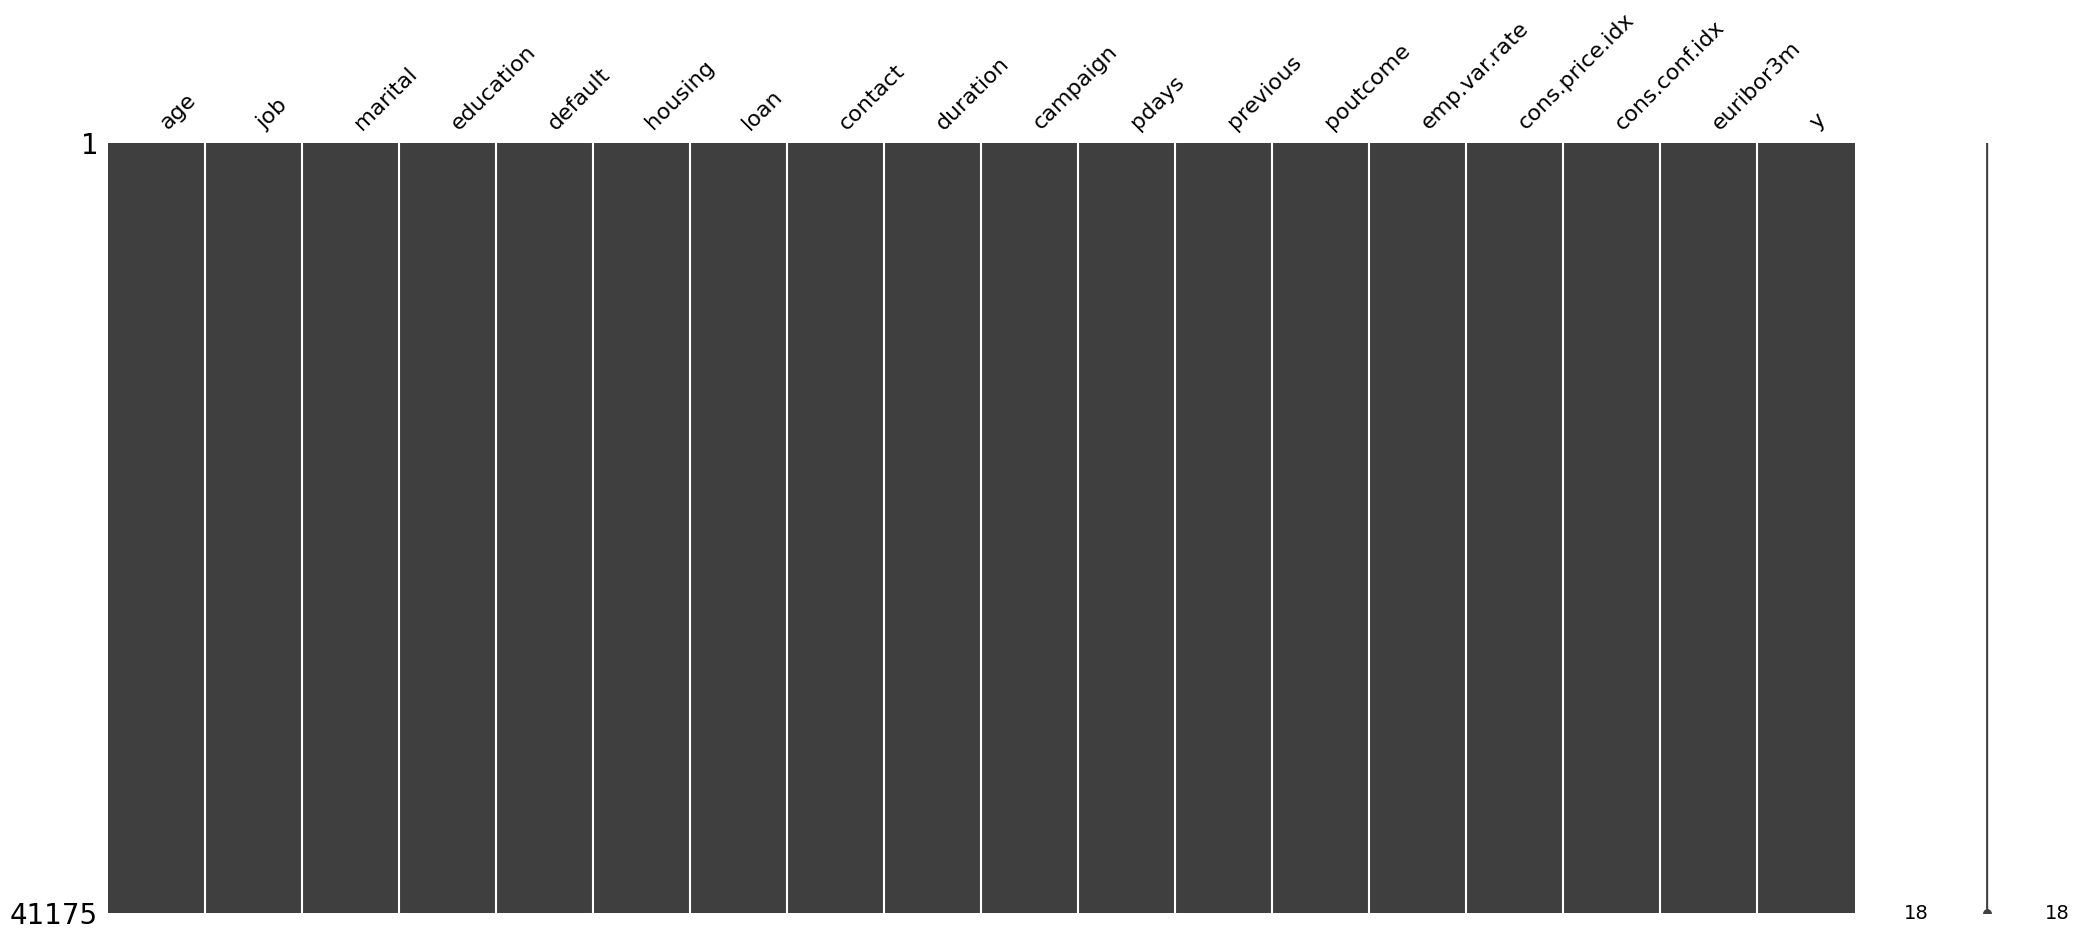

In [734]:
# Visualize missing values in dataframe 
msno.matrix(df)

<Axes: >

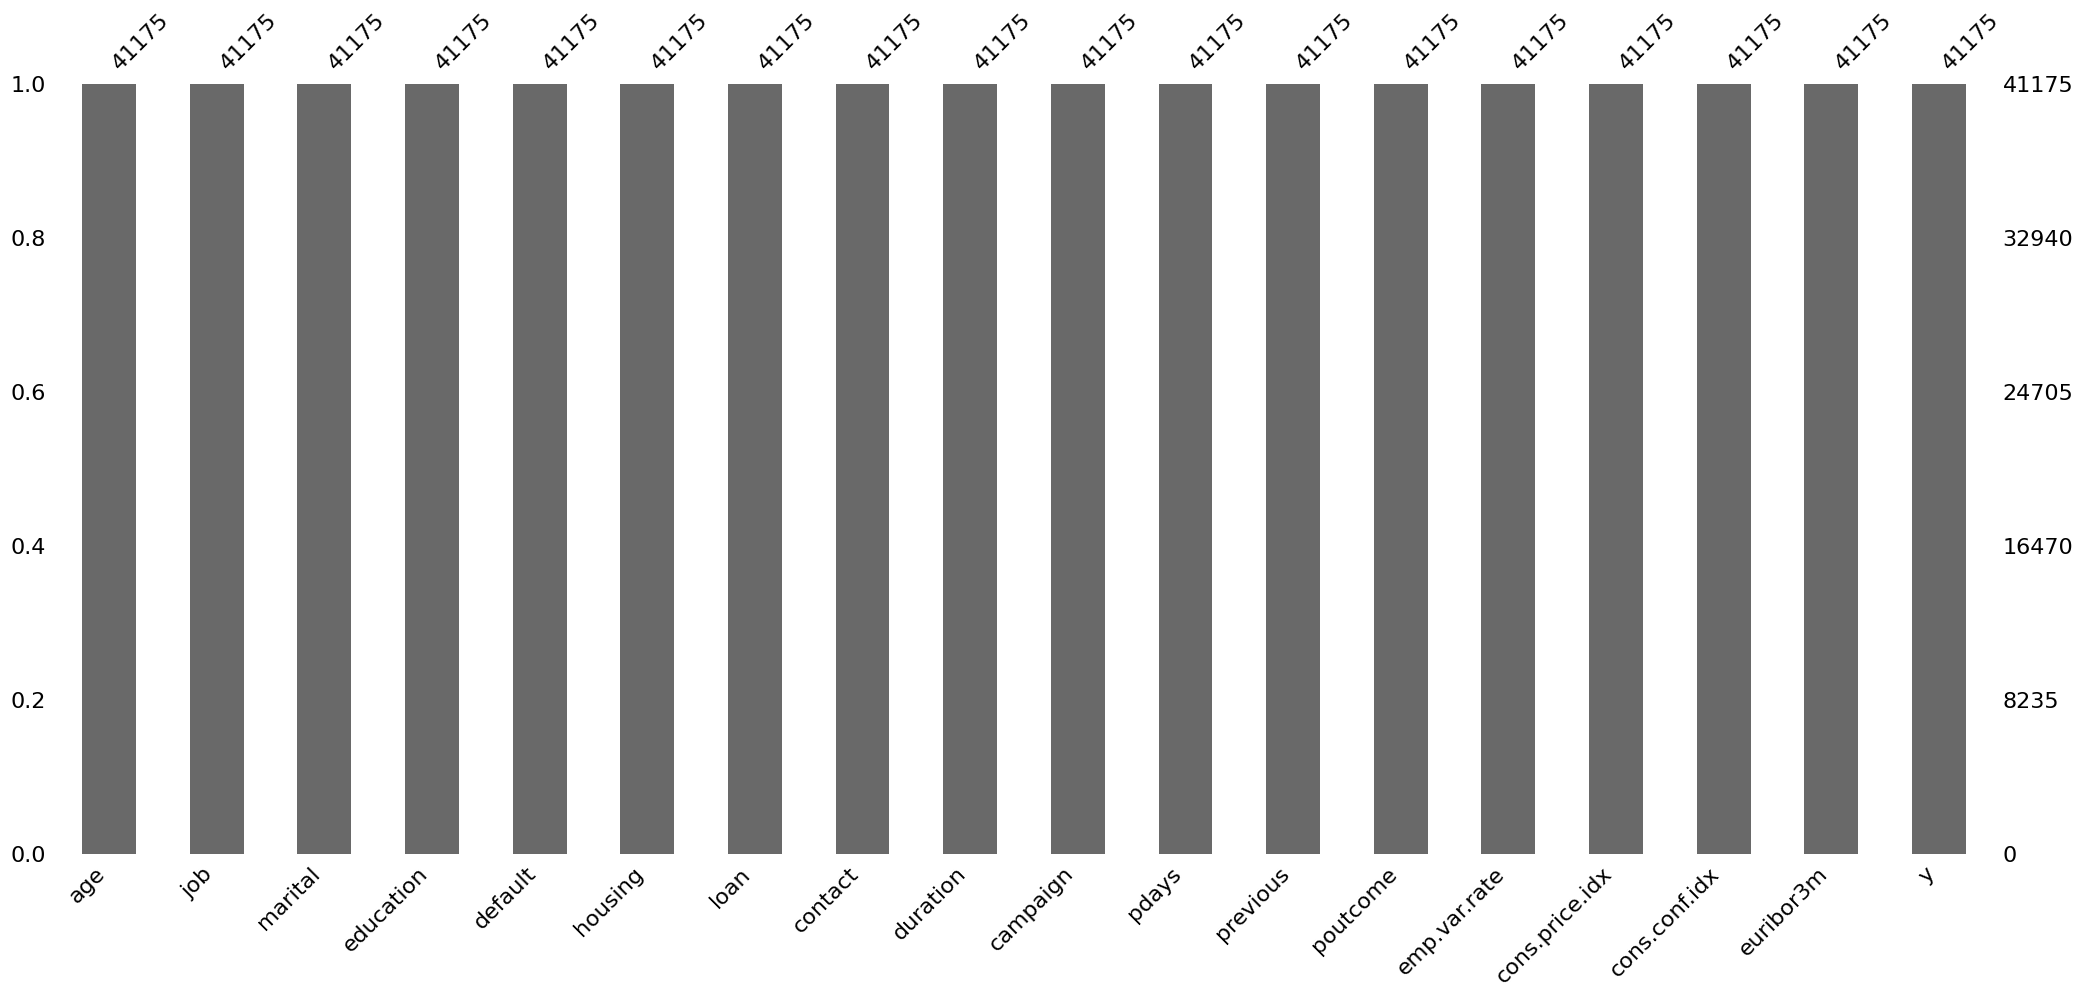

In [735]:
msno.bar(df) 
# There are no missing values in the dataframe

In [736]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41175 entries, 0 to 41174
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41175 non-null  int64  
 1   job             41175 non-null  object 
 2   marital         41175 non-null  object 
 3   education       41175 non-null  object 
 4   default         41175 non-null  object 
 5   housing         41175 non-null  object 
 6   loan            41175 non-null  object 
 7   contact         41175 non-null  object 
 8   duration        41175 non-null  int64  
 9   campaign        41175 non-null  int64  
 10  pdays           41175 non-null  int64  
 11  previous        41175 non-null  int64  
 12  poutcome        41175 non-null  object 
 13  emp.var.rate    41175 non-null  float64
 14  cons.price.idx  41175 non-null  float64
 15  cons.conf.idx   41175 non-null  float64
 16  euribor3m       41175 non-null  float64
 17  y               41175 non-null 

In [737]:
# Change 'job' and 'education' columns to numeric combining both columns
df['job_edu']= df['job']+'_'+df['education']
print(f"Column job_edu values: {df['job_edu'].unique()}")
# Initialize the label encoder
label_encoder = LabelEncoder()
# Apply label encoding to the column
df['job_edu'] = label_encoder.fit_transform(df['job_edu'])
df.drop(['job', 'education'],axis=1, inplace=True)

# Change 'marital' column to numeric
# Initialize the label encoder
label_encoder = LabelEncoder()
# Apply label encoding to the column
df['marital'] = label_encoder.fit_transform(df['marital'])

# Change 'default' column to numeric
# Initialize the label encoder
label_encoder = LabelEncoder()
# Apply label encoding to the column
df['default'] = label_encoder.fit_transform(df['default'])

# Change 'housing' column to numeric
# Initialize the label encoder
label_encoder = LabelEncoder()
# Apply label encoding to the column
df['housing'] = label_encoder.fit_transform(df['housing'])

# Change 'loan' column to numeric
# Initialize the label encoder
label_encoder = LabelEncoder()
# Apply label encoding to the column
df['loan'] = label_encoder.fit_transform(df['loan'])

# Change 'contact' column to numeric
# Initialize the label encoder
label_encoder = LabelEncoder()
# Apply label encoding to the column
df['contact'] = label_encoder.fit_transform(df['contact'])

# Change 'poutcome' column to numeric
# Initialize the label encoder
label_encoder = LabelEncoder()
# Apply label encoding to the column
df['poutcome'] = label_encoder.fit_transform(df['poutcome'])

# Change 'y' column to numeric
# Initialize the label encoder
label_encoder = LabelEncoder()
# Apply label encoding to the column
df2=df.copy()
df2['y'] = label_encoder.fit_transform(df2['y'])

Column job_edu values: ['housemaid_basic.4y' 'services_high.school' 'admin._basic.6y'
 'services_basic.9y' 'admin._professional.course' 'blue-collar_unknown'
 'technician_professional.course' 'blue-collar_high.school'
 'blue-collar_basic.6y' 'retired_basic.9y' 'blue-collar_basic.9y'
 'management_basic.9y' 'unemployed_high.school' 'blue-collar_basic.4y'
 'retired_high.school' 'technician_high.school' 'admin._high.school'
 'technician_university.degree' 'technician_unknown'
 'self-employed_basic.9y' 'unknown_university.degree' 'admin._unknown'
 'management_basic.4y' 'unknown_basic.4y' 'technician_basic.9y'
 'admin._university.degree' 'technician_basic.4y'
 'management_university.degree' 'entrepreneur_high.school'
 'unemployed_professional.course' 'entrepreneur_university.degree'
 'admin._basic.9y' 'management_basic.6y' 'unknown_unknown'
 'management_unknown' 'unemployed_basic.9y' 'services_professional.course'
 'services_unknown' 'housemaid_basic.6y' 'entrepreneur_unknown'
 'retired_univ

In [738]:
df2.info()
df2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41175 entries, 0 to 41174
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41175 non-null  int64  
 1   marital         41175 non-null  int64  
 2   default         41175 non-null  int64  
 3   housing         41175 non-null  int64  
 4   loan            41175 non-null  int64  
 5   contact         41175 non-null  int64  
 6   duration        41175 non-null  int64  
 7   campaign        41175 non-null  int64  
 8   pdays           41175 non-null  int64  
 9   previous        41175 non-null  int64  
 10  poutcome        41175 non-null  int64  
 11  emp.var.rate    41175 non-null  float64
 12  cons.price.idx  41175 non-null  float64
 13  cons.conf.idx   41175 non-null  float64
 14  euribor3m       41175 non-null  float64
 15  y               41175 non-null  int64  
 16  job_edu         41175 non-null  int64  
dtypes: float64(4), int64(13)
memory

(41175, 17)

In [739]:
# Check if duplicates
print(f"Duplicate values: {df.duplicated().sum():.2f}")

Duplicate values: 0.00


In [740]:
stats = df2.describe(include="all")
print(stats)


                age       marital       default       housing          loan  \
count  41175.000000  41175.000000  41175.000000  41175.000000  41175.000000   
mean      40.023679      1.172750      0.208889      1.071815      0.327529   
std       10.420778      0.608912      0.406699      0.985303      0.723707   
min       17.000000      0.000000      0.000000      0.000000      0.000000   
25%       32.000000      1.000000      0.000000      0.000000      0.000000   
50%       38.000000      1.000000      0.000000      2.000000      0.000000   
75%       47.000000      2.000000      0.000000      2.000000      0.000000   
max       98.000000      3.000000      2.000000      2.000000      2.000000   

            contact      duration      campaign         pdays      previous  \
count  41175.000000  41175.000000  41175.000000  41175.000000  41175.000000   
mean       0.365270    258.319150      2.567917    962.463922      0.173018   
std        0.481512    259.307587      2.770341    

In [741]:
# Feature importance
# Train/test split
X = df2.drop(['y'], axis=1)
y = df2['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature importance using xgb
xgb = XGBClassifier(n_estimators=10)
xgb_model = xgb.fit(X_train, y_train)

In [742]:
print(xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [743]:
# Access feature importance scores
importance_scores = xgb_model.feature_importances_

# Print the scores along with feature names
for feature, score in zip(df2.columns, importance_scores):
    print(f"{feature}: {score}")

age: 0.017634756863117218
marital: 0.004284407012164593
default: 0.02590765990316868
housing: 0.0052353027276694775
loan: 0.014232473447918892
contact: 0.02403067983686924
duration: 0.2505587339401245
campaign: 0.013594008982181549
pdays: 0.06582522392272949
previous: 0.016379225999116898
poutcome: 0.03563512861728668
emp.var.rate: 0.1334778517484665
cons.price.idx: 0.05298219621181488
cons.conf.idx: 0.14569608867168427
euribor3m: 0.18327659368515015
y: 0.011249723844230175


In [744]:
# Select the features with more than 1% of importance
df_imp = pd.DataFrame({'Feature':X_train.columns, 'Importance':xgb_model.feature_importances_*100})
df_imp = df_imp.sort_values(by='Importance', ascending=False)
df_imp

,Feature,Importance
6,duration,25.055874
14,euribor3m,18.327660
13,cons.conf.idx,14.569609
11,emp.var.rate,13.347785
8,pdays,6.582522
12,cons.price.idx,5.298220
10,poutcome,3.563513
2,default,2.590766
5,contact,2.403068
0,age,1.763476


In [745]:
df_imp[df_imp.Importance>1]['Feature'].values



array(['duration', 'euribor3m', 'cons.conf.idx', 'emp.var.rate', 'pdays',
       'cons.price.idx', 'poutcome', 'default', 'contact', 'age',
       'previous', 'loan', 'campaign', 'job_edu'], dtype=object)

In [746]:
# Select the features with more than 1% of importance
X_train = X_train[df_imp[df_imp.Importance>1]['Feature'].values]
X_test = X_test[df_imp[df_imp.Importance>1]['Feature'].values]

In [747]:
# VIF
X_train.corr()


,duration,euribor3m,cons.conf.idx,emp.var.rate,pdays,cons.price.idx,poutcome,default,contact,age,previous,loan,campaign,job_edu
duration,1.000000,-0.033620,-0.008610,-0.028746,-0.049967,0.003401,0.036982,-0.012326,-0.026649,0.000061,0.019831,-0.002434,-0.069689,-0.005033
euribor3m,-0.033620,1.000000,0.278108,0.972133,0.296247,0.688212,0.185312,0.193762,0.397745,0.006910,-0.452376,0.006044,0.134207,-0.007171
cons.conf.idx,-0.008610,0.278108,1.000000,0.196919,-0.095169,0.058890,0.180498,0.025800,0.250669,0.125772,-0.049258,-0.006766,-0.011672,0.059370
emp.var.rate,-0.028746,0.972133,0.196919,1.000000,0.270253,0.775563,0.194641,0.202442,0.391786,-0.004557,-0.418288,0.007043,0.149909,-0.008189
pdays,-0.049967,0.296247,-0.095169,0.270253,1.000000,0.080150,-0.470933,0.079067,0.115214,-0.034369,-0.587910,-0.000495,0.050726,-0.033986
cons.price.idx,0.003401,0.688212,0.058890,0.775563,0.080150,1.000000,0.212950,0.167043,0.590777,-0.002561,-0.202518,0.000190,0.126949,-0.019168
poutcome,0.036982,0.185312,0.180498,0.194641,-0.470933,0.212950,1.000000,0.023673,0.120351,0.020922,-0.314098,0.003391,0.034874,0.012501
default,-0.012326,0.193762,0.025800,0.202442,0.079067,0.167043,0.023673,1.000000,0.132806,0.165859,-0.101188,-0.002575,0.037403,-0.043665
contact,-0.026649,0.397745,0.250669,0.391786,0.115214,0.590777,0.120351,0.132806,1.000000,0.002770,-0.210660,-0.007566,0.077506,-0.030484
age,0.000061,0.006910,0.125772,-0.004557,-0.034369,-0.002561,0.020922,0.165859,0.002770,1.000000,0.023559,-0.006880,0.004418,-0.004968


In [748]:
vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns)
vif

duration             1.065047
euribor3m         5671.342849
cons.conf.idx        8.502168
emp.var.rate      7627.151761
pdays              132.544336
cons.price.idx     378.044114
poutcome            79.515767
default              1.686504
contact             40.813465
age                  1.350495
previous           125.269016
loan                 1.003816
campaign             1.429435
job_edu              1.051307
dtype: float64

<Axes: >

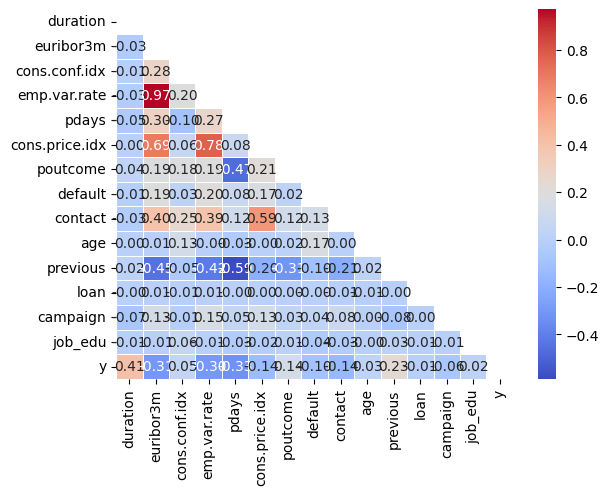

In [749]:
# Heatmap of correlation
X_corr = X_train.copy()
X_corr['y'] = y_train
corr = X_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

In [750]:
# Analysing vif, correlation heatmap and importance, there are 4 variables with high correlation: 'emp.var.rate', 'euribor3m', 'cons.price.idex','contact'
# Eliminate features with VIF > 10 except 'cons.price.idx' that has importance
X_train.drop(['pdays', 'poutcome', 'previous', 'emp.var.rate', 'euribor3m', 'contact'], axis=1, inplace=True)
X_test.drop(['pdays', 'poutcome', 'previous', 'emp.var.rate', 'euribor3m', 'contact'], axis=1, inplace=True)

In [751]:
vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns)
vif

duration          1.021571
cons.conf.idx     1.099920
cons.price.idx    1.211091
default           1.260597
age               1.193055
loan              1.000664
campaign          1.091358
job_edu           1.024081
dtype: float64

In [752]:
# Binary variables
binary_cols = X_train[(X_train == 0)|(X_train == 1)].dropna(axis=1).columns
binary_cols
# No binary variables in X_train
X_train

,duration,cons.conf.idx,cons.price.idx,default,age,loan,campaign,job_edu
12346,1576,-42.7,93.918,0,30,0,3,58
18751,28,-42.7,93.918,0,28,0,5,73
31271,18,-46.2,92.893,1,31,0,1,9
3315,135,-36.4,93.994,0,35,0,1,6
21960,252,-36.1,93.444,0,36,0,1,73
...,...,...,...,...,...,...,...,...
6265,121,-36.4,93.994,0,24,2,2,81
11284,43,-41.8,94.465,0,60,0,3,16
38158,99,-26.9,92.431,0,29,0,1,6
860,295,-36.4,93.994,0,40,0,2,37


In [753]:
# Features scaling
# Scaling of the train values
scaler = MinMaxScaler().fit(X_train)
# Transformation with the calculated scaler
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)
# Final X_train
X_train_sc


array([[0.32045547, 0.33891213, 0.66913484, ..., 0.        , 0.03636364,
        0.65168539],
       [0.00569337, 0.33891213, 0.66913484, ..., 0.        , 0.07272727,
        0.82022472],
       [0.00366002, 0.19246862, 0.26968044, ..., 0.        , 0.        ,
        0.1011236 ],
       ...,
       [0.02013013, 1.        , 0.08963367, ..., 0.        , 0.        ,
        0.06741573],
       [0.05998373, 0.60251046, 0.69875292, ..., 0.        , 0.01818182,
        0.41573034],
       [0.2350549 , 0.33891213, 0.66913484, ..., 0.        , 0.        ,
        0.06741573]], shape=(32940, 8))

In [754]:
X_train_sc = pd.concat([pd.DataFrame(X_train_sc, columns = X_train.columns)], axis=1)
X_test_sc = pd.concat([pd.DataFrame(X_test_sc, columns = X_test.columns)], axis=1)
# Final X_train after EDA
X_train_sc

,duration,cons.conf.idx,cons.price.idx,default,age,loan,campaign,job_edu
0,0.320455,0.338912,0.669135,0.0,0.160494,0.0,0.036364,0.651685
1,0.005693,0.338912,0.669135,0.0,0.135802,0.0,0.072727,0.820225
2,0.003660,0.192469,0.269680,0.5,0.172840,0.0,0.000000,0.101124
3,0.027450,0.602510,0.698753,0.0,0.222222,0.0,0.000000,0.067416
4,0.051240,0.615063,0.484412,0.0,0.234568,0.0,0.000000,0.820225
...,...,...,...,...,...,...,...,...
32935,0.024603,0.602510,0.698753,0.0,0.086420,1.0,0.018182,0.910112
32936,0.008743,0.376569,0.882307,0.0,0.530864,0.0,0.036364,0.179775
32937,0.020130,1.000000,0.089634,0.0,0.148148,0.0,0.000000,0.067416
32938,0.059984,0.602510,0.698753,0.0,0.283951,0.0,0.018182,0.415730


In [755]:
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_sc, y_train)

LogisticRegression()

In [756]:
# Evaluate the model
y_pred = model.predict(X_test_sc)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 88.71%


In [757]:
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

y_test = pd.Series(y_test, name='Actual')
y_predicted = pd.Series(y_pred, name='Predicted')
print(pd.crosstab(y_test, y_pred))



Confusion Matrix:
 [[7133  120]
 [ 810  172]]
col_0      0    1
Actual           
0       7133  120
1        810  172


In [758]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7253
           1       0.59      0.18      0.27       982

    accuracy                           0.89      8235
   macro avg       0.74      0.58      0.60      8235
weighted avg       0.86      0.89      0.86      8235



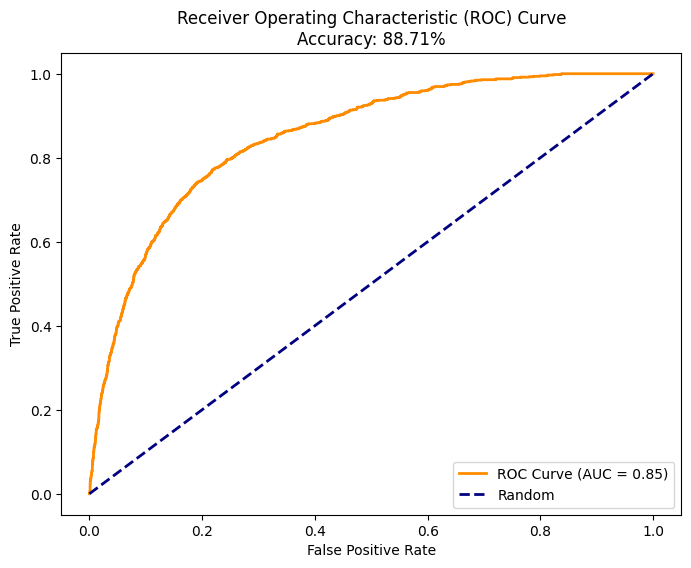

In [759]:
# Plot ROC Curve
y_prob = model.predict_proba(X_test_sc)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(
    accuracy * 100))
plt.legend(loc="lower right")
plt.show()


In [760]:
# Without optimizing the hyperparameters: the accuracy is 88.71% and the AUC is 0.85.
# Optimize the model
# Create a parameter grid for hyperparameters tuning in Logistic Regression
param_grid = {'penalty':['l2', None],
    'C' : np.logspace(-4,4,5),
    'solver': ['newton-cg','saga'],
    'max_iter'  : [100,1000]
}

clf = GridSearchCV(model,param_grid = param_grid, cv = 3, verbose=True,n_jobs=-1)
clf

best_clf = clf.fit(X_train_sc, y_train)
best_clf.best_estimator_

print(f'Accuracy - : {best_clf.score(X_test_sc, y_test):.3f}')

Fitting 3 folds for each of 40 candidates, totalling 120 fits


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1207: U

Accuracy - : 0.889


The Accuracy with the optimization of the hyperparameters was improved.
The updated Accuracy is 88,9% and the Accuracy without optimizing the hyperparameters was 88.71%